In [1]:
#!pip install python-speech-features
import numpy as np
import os
import glob
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' 

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4912065289394942147
xla_global_id: -1
]


In [4]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()
from tensorflow.python.client import device_lib
physical_devices = tf.config.list_physical_devices('GPU')
physical_devices

[]

In [5]:
path = os.path.expanduser('~')
path=os.path.join(path, "Documents", "courses", "MLSP", "Audio_Classification-MLSP", "Audio_Classification-MLSP")
data_path=os.path.join(path, "train")
label_path=path
data=pd.read_csv(os.path.join(label_path, "annotations.csv"))
# npy_files = glob.glob(os.path.join(data_path, "*.npy"))

In [6]:
audios=[]
i=0
files=data["fname"]
for file in files:
    arr=np.load(os.path.join(data_path, file))
    m,n,o=arr.shape
    arr.resize(n,o)
#     print(arr.shape)
    mel_spect = librosa.power_to_db(arr, ref=np.median)
    audios.append(mel_spect)
    i=i+1
features=audios 

# Feature Reduction by extracting high energy amplitudes

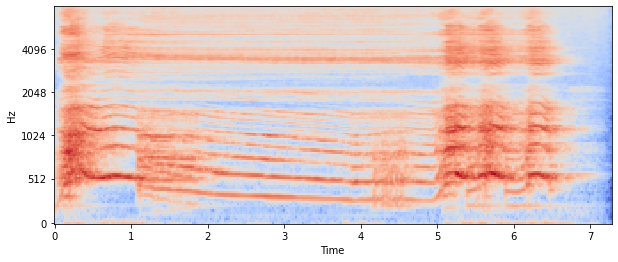

In [7]:
import librosa.display
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 4))
img = librosa.display.specshow(audios[0], x_axis='time', y_axis='mel', fmax=8000)
plt.savefig("out.png")
plt.show()

In [41]:
def get_highenergyFeatures(inp, num):
    if inp.shape[1] < num:
        inp=np.concatenate((inp, np.zeros((128, num-inp.shape[1]))), axis=1)
    features_ = np.sum(inp, axis=0)
    list_f = [[features_[i],i] for i in range(len(features_))]
    temp_f = sorted(list_f,key = lambda x:-x[0])
    temp_top_f = temp_f[:num]
    final_f = sorted(temp_top_f,key = lambda x:x[1])
    list_top_f = [inp[:,final_f[i][1]] for i in range(len(final_f))]
    return np.array(list_top_f).transpose()

In [9]:
for i in range(len(features)):
    features[i]=get_highenergyFeatures(features[i], 128)
    print(features[i].shape)


(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

In [10]:
mfcc=[]
from scipy import fft
for inp in features:
    dct_ = fft.dct(np.array(inp))
#     dct_=dct_[:20, :]
    mfcc.append(dct_)

In [11]:
np.array(mfcc).shape

(1000, 128, 128)

# Extracting Mfcc, delta and delta-delta coefficients

In [12]:
import python_speech_features
# energy = extract_energy(sig)
# feat = np.hstack(mfcc)
delta_feat=[]
delta_delta_feat=[]
all_feats=[]
for m in np.array(mfcc):
    feat=python_speech_features.delta(m, 2)
    print(feat.shape)
    feat=np.array(feat)
    delta_feat.append(feat)
    delta_delta=python_speech_features.delta(feat, 2)
    delta_delta=np.array(delta_delta)
    delta_delta_feat.append(delta_delta)
    print(delta_delta.shape)
    all_feats.append([m, feat, delta_delta])


(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)
(128, 128)

In [13]:
all_feats=np.array(all_feats)
print(all_feats.shape)
# len(list(all_feats))

(1000, 3, 128, 128)


# Data Augmentation

In [14]:
from scipy.ndimage import gaussian_filter
def gauss(inp, var):
    return gaussian_filter(inp, var)
temp=list(all_feats)
for i in range(len(list(all_feats))):
#     print(i)
    temp.append(gauss(all_feats[i], .6))
final=temp

In [15]:
len(final)

2000

In [16]:
y=data['label']
y_=list(y)
for ind, i in enumerate(y):
#     print(ind)
    y_.append(i)
y=np.array(y_)
y.shape

(2000,)

In [17]:
final=np.array(final)
final.shape

(2000, 3, 128, 128)

In [18]:
i=0
features=[]
for mat in final:
    s=mat.shape
#     mat=mat.reshape(s[1], s[2], s[0])
    features.append(tf.convert_to_tensor(mat.T))
    i=i+1

In [19]:
X=np.array(np.array(features))
type(X)
print(X.shape)

(2000, 128, 128, 3)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

print(y_test.shape)
val_label=pd.Series(list(y_test))
val_label.value_counts()

(400,)


Crying_and_sobbing                       47
Bark                                     47
Siren                                    45
Meow                                     41
Doorbell                                 40
Microwave_oven                           39
Vehicle_horn_and_car_horn_and_honking    38
Knock                                    36
Shatter                                  34
Walk_and_footsteps                       33
dtype: int64

# String to One-Hot

In [21]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
test_encoder = LabelEncoder()
test_ = test_encoder.fit_transform(y_test)
to_onehot=to_categorical(test_)
y_test=to_onehot
train_encoder = LabelEncoder()
train_ = train_encoder.fit_transform(y_train)
to_onehot=to_categorical(train_)
y_train=to_onehot

### Transfer learning using VGG-16 pretrained weights followed by dense  and softmax layer 

In [22]:
from keras.applications import VGG16
from tensorflow.keras.regularizers import L2 as l2
alpha=0.05
reg=0.001
vgg_model = VGG16(weights='imagenet',include_top=False, input_shape=(128, 128, 3))
for layer in vgg_model.layers:
    layer.trainable = False
for i, layer in enumerate(vgg_model.layers):
    print(i, layer.name, layer.trainable)
x = vgg_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='linear', kernel_regularizer=l2(reg))(x)
x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='linear', kernel_regularizer=l2(reg))(x)
x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='linear', kernel_regularizer=l2(reg))(x)
x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.models.Model(inputs=vgg_model.input, outputs=x)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False


In [23]:
from keras import backend as K
from sklearn.metrics import precision_score , recall_score
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [24]:
# filepath = '7*7_SE_weights.{epoch:02d}-{val_loss:.2f}.h5'
file=os.getcwd()
filepath=os.path.join(file, "./transfer_max_filtering_saved_models_2/SE_7_7_{epoch:02d}.h5")

In [25]:
os.getcwd()

'C:\\Users\\dell\\Documents\\Courses\\MLSP\\models\\PCA'

In [26]:
from keras.callbacks import ReduceLROnPlateau
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.01,
                              patience=7,
                              mode='auto')
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2)

In [27]:
X_train[0].shape
X_train.shape

(1600, 128, 128, 3)

In [28]:
# X_train = numpy.asarray(X_train).astype(numpy.array)
# y_train = numpy.asarray(y_train).astype(numpy.array)
from matplotlib import pyplot as plt
# model = create_model(input_shape=X_train.shape[1:])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=30, verbose = 2, callbacks=[model_checkpoint_callback])

In [ ]:
import os
# from config import get_config
# config = get_config()
# path=os.getcwd()
# path=os.path.join(path, "Documents", "courses", "MLSP", "Audio_Classification-MLSP", "Audio_Classification-MLSP", "models")
# path2=os.path.join(path, "Documents", "courses", "MLSP", "models", "SE_cnn", "79.5_cnn.h5")
# model.save(path2)
# model1=tf.keras.models.load_model(path, compile=True,  custom_objects={'CategoricalAccuracy': tf.keras.metrics.CategoricalAccuracy(name="accuracy")})


# print(loaded.values())
# model.test_on_batch(X_test, y_test)

In [ ]:
# from keras.models import load_model
# loaded = load_model('79.5_cnn.h5', custom_objects={"lr": lr_track })

In [55]:
loaded = tf.keras.models.load_model('transfer_max_filtering_saved_models/SE_7_7_38.h5', custom_objects={'f1_m':tf.keras.metrics.CategoricalAccuracy(name="f1_m"),'precision_m':tf.keras.metrics.CategoricalAccuracy(name="precision_m"), 'recall_m':tf.keras.metrics.CategoricalAccuracy(name="recall_m") })

In [ ]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = sum([1 for i in range(len(y_true)) if numpy.all(y_true[i]==y_pred[i])])
    # iterate over each label and check
#     for i in range(len(y_true)):
#         if y_true[i] == x_true[i]:
#             correct_predictions += 1
    
    # compute the accuracy
    accuracy = correct_predictions/len(y_true)
    return accuracy

In [ ]:
compute_accuracy(y_test, y_pred)

In [ ]:
t_pred=loaded.predict(X_test)

In [ ]:
precision=precision_m(y_test, t_pred)
recall=recall_m(y_test, t_pred)
f1=f1_m(y_test, t_pred)
print("precision:{}, recall:{}, f1: {}".format(precision, recall, f1))

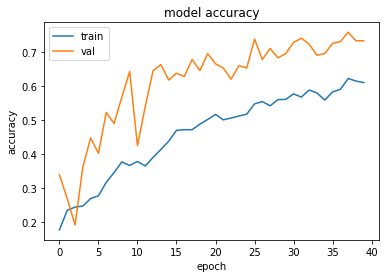

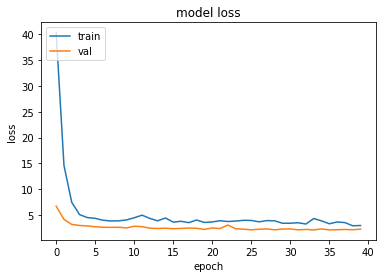

In [46]:
model.metrics_names
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
path_save=os.path.join(path, "Documents", "courses", "MLSP", "models")
model.save(path_save)

In [ ]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

13/13 [==============================] - 1s 80ms/step - loss: 0.4967 - accuracy: 0.9350 - f1_m: 0.9358 - precision_m: 0.9439 - recall_m: 0.9279
n Test_Accuracy:- 0.9350000023841858
13/13 [==============================] - 1s 74ms/step
[8 5 9 6 3 7 6 3 7 5 1 5 4 8 0 9 4 8 7 5 1 6 0 2 0 8 9 2 3 1 2 8 9 1 8 5 0
 0 7 9 4 0 6 3 0 9 9 6 4 6 8 7 8 0 4 6 7 7 2 1 7 2 5 8 3 5 7 3 7 4 5 1 6 6
 7 9 3 8 8 2 5 8 1 7 1 3 0 7 0 5 1 7 7 1 3 9 5 1 6 8 2 8 3 1 5 0 0 7 2 9 4
 0 4 4 2 1 7 6 5 8 9 3 4 0 5 2 1 6 9 0 1 0 1 6 3 1 2 1 9 1 8 4 3 1 2 8 9 1
 2 2 0 5 3 4 7 6 1 4 7 2 5 7 0 8 0 4 9 9 8 5 6 1 2 5 8 4 9 2 1 8 0 3 0 2 3
 7 4 0 5 7 4 9 6 2 0 9 8 2 1 9 8 6 2 4 8 5 0 0 0 4 3 3 3 9 8 9 1 0 9 5 8 1
 6 2 3 2 5 3 8 0 3 4 7 4 3 9 1 2 0 5 0 8 3 1 7 7 0 4 5 2 2 7 8 2 5 1 1 2 9
 3 1 2 6 9 5 7 6 6 2 7 8 0 5 3 9 0 8 8 2 1 6 2 6 0 0 1 1 4 9 7 3 6 4 6 6 8
 6 7 5 5 1 0 4 7 6 3 9 2 1 1 9 2 0 8 8 6 2 5 6 3 8 2 3 1 0 0 9 0 4 2 8 5 0
 0 7 5 4 3 5 6 4 0 9 7 2 1 3 8 0 9 1 1 7 9 8 5 8 1 7 7 4 6 5 2 5 5 7 4 8 6
 7 7 9 4 7 2 9 

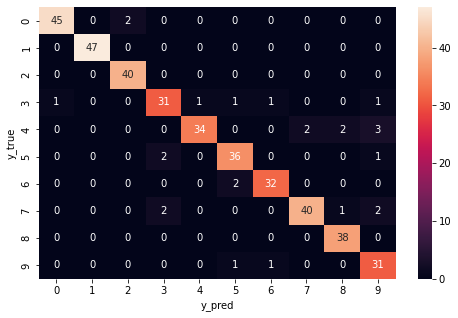

[0.4966604709625244,
 0.9350000023841858,
 0.9357829689979553,
 0.9439361095428467,
 0.9278846383094788]

In [119]:
accuracy = model.evaluate(X_test, y_test)
print('n', 'Test_Accuracy:-', accuracy[1])
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
predictions_index = np.argmax(pred, axis=1)
print(predictions_index)
y_true = np.argmax(y_test, axis=1)
print(y_true)
cf = confusion_matrix(y_true, predictions_index)
print('confusion matrix')
print(cf)
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
accuracy